In [1]:
import geopandas as gp

In [2]:
hd_difference = gp.read_file("inputs/Heidelberg_difference.json")
hd_difference = hd_difference.loc[hd_difference.difference_self17 != 0]
hd_difference.head()

,id,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,...,difference_self15,difference_self16,difference_self17,difference_self18,difference_self19,difference_self20,difference_self21,difference_self22,difference_self23,geometry
0,891fae6db2fffff,12960,0.0,0.0,0.000000,0.0,0.0,1.722581,12.638821,20.935597,...,20.416667,22.676923,20.902265,20.582927,21.808901,24.627160,25.629464,24.812808,18.964401,"POLYGON ((8.61057 49.36374, 8.61303 49.36314, ..."
1,891faad665bffff,12960,0.0,0.0,0.000000,0.0,0.0,2.028571,12.783410,20.795053,...,20.233100,22.973934,20.706235,20.393865,21.638522,24.590799,25.290249,24.776722,18.737179,"POLYGON ((8.61303 49.36314, 8.61527 49.36422, ..."
2,891fae6db3bffff,12960,0.0,0.0,0.923841,0.0,0.0,3.038710,14.176334,21.130435,...,20.778679,22.736591,20.919952,20.416361,21.793923,25.681128,25.418750,25.054920,18.741722,"POLYGON ((8.60317 49.36553, 8.60564 49.36493, ..."
3,891fae6db23ffff,12960,0.0,0.0,0.376947,0.0,0.0,2.009231,12.696703,21.407448,...,21.341102,23.008743,21.857296,21.404682,22.089639,28.786780,28.728682,28.529284,22.065421,"POLYGON ((8.60564 49.36493, 8.60787 49.36602, ..."
4,891fae6db27ffff,12960,0.0,0.0,0.197531,0.0,0.0,1.914373,12.486842,21.130913,...,20.930407,23.085271,21.280394,21.019209,21.836299,27.388286,27.539841,27.263858,20.771605,"POLYGON ((8.61258 49.36651, 8.61504 49.36591, ..."


In [3]:
hd_difference.explore(column='difference_self17', cmap='magma_r')

Text(24.847222222222214, 0.5, '° N')

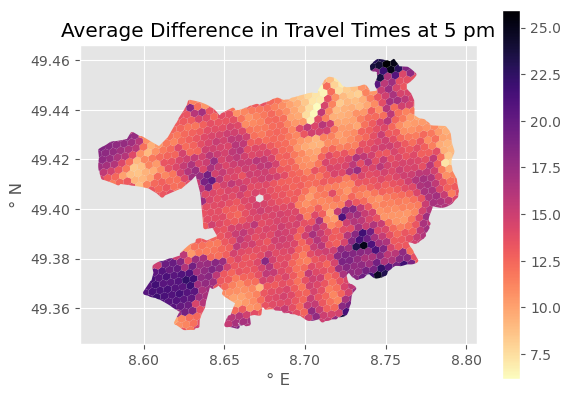

In [26]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
ax = hd_difference.plot(column = 'difference_self17', cmap = 'magma_r', legend=True)
plt.title(label='Average Difference in Travel Times at 5 pm')
plt.xlabel(xlabel = '° E')
plt.ylabel(ylabel='° N')

/tmp/ipykernel_11949/1032766084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot["id"] = hd_difference["id"]


<Axes: xlabel='Time of Day [h]', ylabel='Difference in Travel Time [min]'>

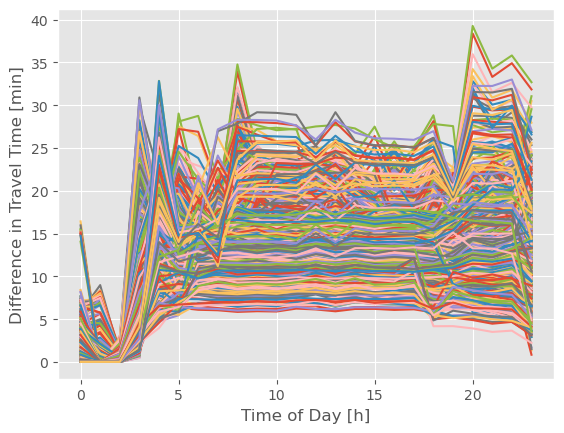

In [16]:

pivot = hd_difference.loc[:, hd_difference.columns.str.startswith("difference")]
pivot["id"] = hd_difference["id"]
plots = pivot.set_index("id").transpose().reset_index()
plots.plot(legend=False, xlabel="Time of Day [h]", ylabel="Difference in Travel Time [min]")

TODO: box plot für planning indicator, per district of heidelberg

In [5]:
boroughs = gp.read_file(filename="inputs/boroughs.json")
boroughs.head()

,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,geometry
0,49.415450,49.372224,8.768830,8.692388,139134533,relation,3283775,49.393824,8.721768,boundary,administrative,18,0.30001,city_district,Altstadt,"Altstadt, Heidelberg, Baden-Württemberg, 69117...","POLYGON ((8.69239 49.41191, 8.69333 49.40964, ..."
1,49.411332,49.396417,8.679977,8.641543,107771397,relation,3283776,49.404644,8.665469,boundary,administrative,18,0.30001,city_district,Bahnstadt,"Bahnstadt, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.64154 49.41130, 8.65239 49.40739, ..."
2,49.412318,49.404317,8.694012,8.656512,107005928,relation,3283777,49.408113,8.678280,boundary,administrative,18,0.30001,city_district,Bergheim,"Bergheim, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.65651 49.41105, 8.65886 49.41022, ..."
3,49.383825,49.366897,8.730404,8.700155,140246307,relation,3283778,49.375335,8.714003,boundary,administrative,18,0.30001,city_district,Boxberg,"Boxberg, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.70015 49.37283, 8.70030 49.37246, ..."
4,49.371833,49.355110,8.728942,8.699760,139336012,relation,3283779,49.363661,8.713632,boundary,administrative,18,0.30001,city_district,Emmertsgrund,"Emmertsgrund, Heidelberg, Baden-Württemberg, G...","POLYGON ((8.69976 49.36536, 8.69997 49.36319, ..."


In [6]:
cells_by_borough = hd_difference.sjoin(boroughs, how="left")
cells_by_borough.dropna(inplace=True)
cells_by_borough.head()

,id,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,...,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
1,891faad665bffff,12960,0.0,0.0,0.000000,0.0,0.0,2.028571,12.783410,20.795053,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."
3,891fae6db23ffff,12960,0.0,0.0,0.376947,0.0,0.0,2.009231,12.696703,21.407448,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."
4,891fae6db27ffff,12960,0.0,0.0,0.197531,0.0,0.0,1.914373,12.486842,21.130913,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."
5,891fae6db07ffff,12960,0.0,0.0,1.432343,0.0,0.0,3.589744,14.905618,20.052817,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."
6,891fae6db33ffff,12960,0.0,0.0,0.684211,0.0,0.0,2.441935,13.237500,21.348891,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."


In [7]:
mean_boroughs = cells_by_borough.groupby(["name"]).mean("difference_self17")
mean_boroughs

,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,difference_self6,...,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_id,lat,lon,place_rank,importance
name,,,,,,,,,,,,,,,,,,,,,
Altstadt,11277.220930,3.143966,0.305357,1.149254,0.022505,0.288064,5.827677,11.519498,12.853284,14.416016,...,49.415450,49.372224,8.768830,8.692388,139134533.0,3283775.0,49.393824,8.721768,18.0,0.300010
Bahnstadt,6455.440000,22.833308,2.217136,3.262712,1.686991,0.135256,11.255060,15.449412,15.733156,15.324189,...,49.411332,49.396417,8.679977,8.641543,107771397.0,3283776.0,49.404644,8.665469,18.0,0.300010
Bergheim,5647.076923,26.780318,2.600522,3.977016,1.658714,0.127283,11.320588,14.993332,14.909163,14.787074,...,49.412318,49.404317,8.694012,8.656512,107005928.0,3283777.0,49.408113,8.678280,18.0,0.300010
Boxberg,12306.102564,3.183476,0.309393,0.338636,0.002624,0.459662,4.845602,13.068910,14.651830,16.565139,...,49.383825,49.366897,8.730404,8.700155,140246307.0,3283778.0,49.375335,8.714003,18.0,0.300010
Emmertsgrund,12573.348837,3.385829,0.329122,0.059592,0.000000,0.646372,4.048316,16.515864,15.308858,16.627876,...,49.371833,49.355110,8.728942,8.699760,139336012.0,3283779.0,49.363661,8.713632,18.0,0.300010
Handschuhsheim,7644.188482,6.473891,0.628407,0.776142,0.034839,0.679903,7.070079,14.358470,11.326455,12.201982,...,49.452420,49.416655,8.740485,8.646552,108052811.0,3283780.0,49.433930,8.692343,18.0,0.300010
Kirchheim,11181.822660,6.415162,0.623203,1.946602,0.014794,0.644446,6.537068,15.038876,15.526337,14.802133,...,49.397620,49.352003,8.678009,8.601004,107954990.0,3283781.0,49.374638,8.640973,18.0,0.300010
Neuenheim,6887.523256,15.390614,1.494310,2.941234,0.511913,0.600708,9.396627,14.582691,14.122136,13.668035,...,49.429302,49.410229,8.733888,8.655573,139726050.0,3283782.0,49.419713,8.701755,18.0,0.300010
Pfaffengrund,6806.245283,16.622043,1.613841,2.531886,2.202771,0.320113,11.566567,15.865530,15.445480,15.198999,...,49.414928,49.390766,8.671368,8.633025,139407102.0,3283783.0,49.397685,8.645710,18.0,0.267719


In [8]:
map = boroughs.merge(mean_boroughs, on="name", how = "inner", )
map.explore(column="difference_self17", cmap="magma_r")

<Axes: >

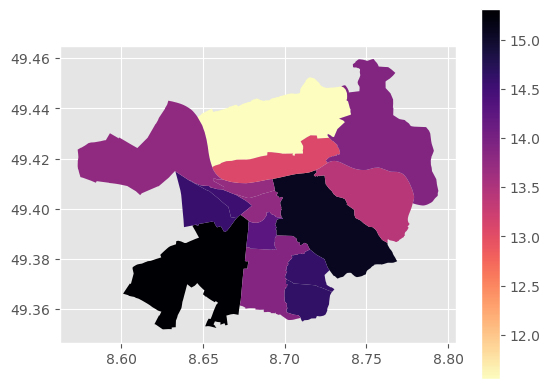

In [14]:
map.plot(column="difference_self17", cmap='magma_r', legend = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'Altstadt'),
  Text(2, 0, 'Bahnstadt'),
  Text(3, 0, 'Bergheim'),
  Text(4, 0, 'Boxberg'),
  Text(5, 0, 'Emmertsgrund'),
  Text(6, 0, 'Handschuhsheim'),
  Text(7, 0, 'Kirchheim'),
  Text(8, 0, 'Neuenheim'),
  Text(9, 0, 'Pfaffengrund'),
  Text(10, 0, 'Rohrbach'),
  Text(11, 0, 'Schlierbach'),
  Text(12, 0, 'Südstadt'),
  Text(13, 0, 'Weststadt'),
  Text(14, 0, 'Wieblingen'),
  Text(15, 0, 'Ziegelhausen')])

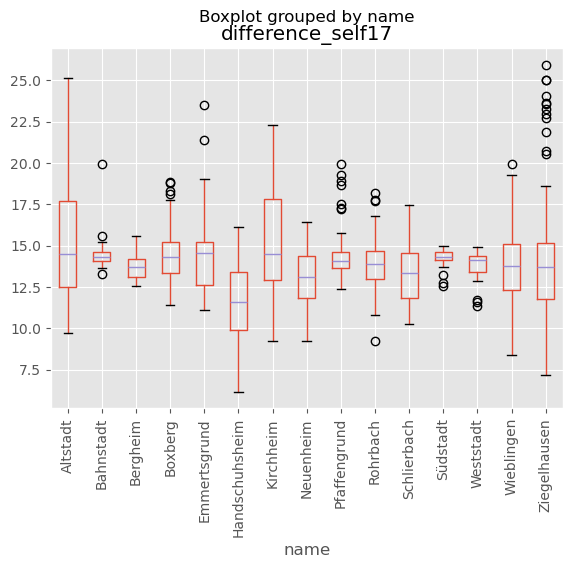

In [9]:
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
ax = cells_by_borough.boxplot(column="difference_self17", by= "name")
plt.xticks(rotation=90)


<Axes: >

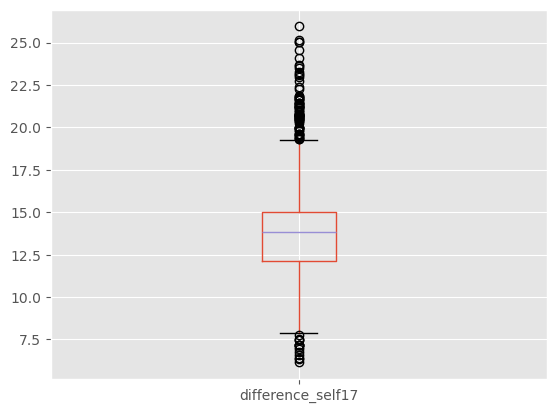

In [10]:
cells_by_borough.boxplot("difference_self17")